Huỳnh Thiện Tùng (19522492)

Bài tập Cài đặt Logistic Regression với Tensorflow/Pytorch

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

Instructions for updating:
non-resource variables are not supported in the long term


Dataset được sử dụng tại link https://media.geeksforgeeks.org/wp-content/uploads/dataset.csv 

In [2]:
df = pd.read_csv('./dataset.csv', header=None)
print(df.shape)

(100, 4)


In [3]:
df.describe()

,0,1,2,3
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,5.471000,3.094000,0.500000
std,29.011492,0.641698,0.476057,0.502519
min,0.000000,4.300000,2.000000,0.000000
25%,24.750000,5.000000,2.800000,0.000000
50%,49.500000,5.400000,3.050000,0.500000
75%,74.250000,5.900000,3.400000,1.000000
max,99.000000,7.000000,4.400000,1.000000


In [4]:
df.head(10)

,0,1,2,3
0,0,5.1,3.5,1
1,1,4.9,3.0,1
2,2,4.7,3.2,1
3,3,4.6,3.1,1
4,4,5.0,3.6,1
5,5,5.4,3.9,1
6,6,4.6,3.4,1
7,7,5.0,3.4,1
8,8,4.4,2.9,1
9,9,4.9,3.1,1


In [5]:
df.tail(10)

,0,1,2,3
90,90,5.5,2.6,0
91,91,6.1,3.0,0
92,92,5.8,2.6,0
93,93,5.0,2.3,0
94,94,5.6,2.7,0
95,95,5.7,3.0,0
96,96,5.7,2.9,0
97,97,6.2,2.9,0
98,98,5.1,2.5,0
99,99,5.7,2.8,0


Quan sát tập dữ liệu trên, ta bỏ cột đầu tiên, lấy 2 cột tiếp theo đại diện cho feature X, cột cuối cùng là label thuộc class {0, 1}

In [6]:
# Ma trận đặc trưng gồm x1, x2
x_orig = df.iloc[:, 1:-1].values
  
# Nhãn dữ liệu
y_orig = df.iloc[:, -1:].values
  
print(x_orig.shape)
print(y_orig.shape)

(100, 2)
(100, 1)


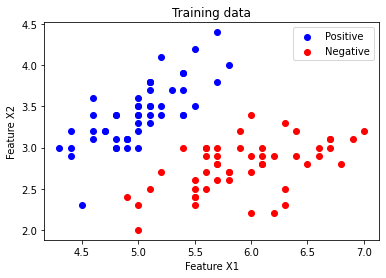

In [7]:
# Positive Data Points
x_pos = np.array([x_orig[i] for i in range(len(x_orig)) if y_orig[i] == 1])
  
# Negative Data Points
x_neg = np.array([x_orig[i] for i in range(len(x_orig)) if y_orig[i] == 0])
  
# Plotting the Positive and Negative Data Points
plt.scatter(x_pos[:, 0], x_pos[:, 1], color = 'blue', label = 'Positive')
plt.scatter(x_neg[:, 0], x_neg[:, 1], color = 'red', label = 'Negative')
  
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')
plt.title('Training data')
plt.legend()
  
plt.show()

In [8]:
# Creating the One Hot Encoder
oneHot = OneHotEncoder()

# Encoding x_orig
oneHot.fit(x_orig)
x = oneHot.transform(x_orig).toarray()

# Encoding y_orig
oneHot.fit(y_orig)
y = oneHot.transform(y_orig).toarray()


alpha, epochs = 0.0035, 500
m, n = x.shape
print('m =', m)
print('n =', n)
print('Learning Rate =', alpha)
print('Number of Epochs =', epochs)

m = 100
n = 51
Learning Rate = 0.0035
Number of Epochs = 500


In [9]:
# There are n columns in the feature matrix
# after One Hot Encoding.
X = tf.placeholder(tf.float32, [None, n])

# Since this is a binary classification problem,
# Y can take only 2 values.
Y = tf.placeholder(tf.float32, [None, 2])

# Trainable Variable Weights
W = tf.Variable(tf.zeros([n, 2]))

# Trainable Variable Bias
b = tf.Variable(tf.zeros([2]))


In [10]:
# Hypothesis
Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b))

# Sigmoid Cross Entropy Cost Function
cost = tf.nn.sigmoid_cross_entropy_with_logits(logits = Y_hat, labels = Y)

# Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate = alpha).minimize(cost)

# Global Variables Initializer
init = tf.global_variables_initializer()


In [11]:
# Starting the Tensorflow Session
with tf.Session() as sess:

    # Initializing the Variables
    sess.run(init)

    # Lists for storing the changing Cost and Accuracy in every Epoch
    cost_history, accuracy_history = [], []

    # Iterating through all the epochs
    for epoch in range(epochs):
        cost_per_epoch = 0

        # Running the Optimizer
        sess.run(optimizer, feed_dict = {X : x, Y : y})

        # Calculating cost on current Epoch
        c = sess.run(cost, feed_dict = {X : x, Y : y})
        # Calculating accuracy on current Epoch
        correct_prediction = tf.equal(tf.argmax(Y_hat, 1), tf.argmax(Y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        # Storing Cost and Accuracy to the history
        cost_history.append(sum(sum(c)))
        accuracy_history.append(accuracy.eval({X : x, Y : y}) * 100)

        # Displaying result on current Epoch
        if (epoch + 1) % 100 == 0 and epoch != 0:
            print("Epoch " + str(epoch+1) + " Cost: " + str(cost_history[-1]))

    Weight = sess.run(W) # Optimized Weight
    Bias = sess.run(b) # Optimized Bias

    # Final Accuracy
    correct_prediction = tf.equal(tf.argmax(Y_hat, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("\nAccuracy:", accuracy_history[-1], "%")


Epoch 100 Cost: 136.38085174560547
Epoch 200 Cost: 132.71681213378906
Epoch 300 Cost: 129.7982940673828
Epoch 400 Cost: 127.31647109985352
Epoch 500 Cost: 125.27126693725586

Accuracy: 87.00000047683716 %


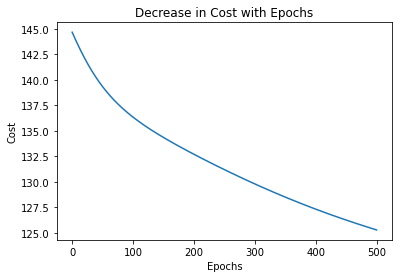

In [12]:
plt.plot(list(range(epochs)), cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Decrease in Cost with Epochs')

plt.show()


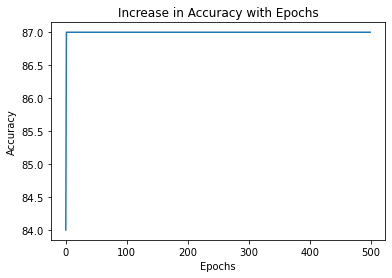

In [13]:
plt.plot(list(range(epochs)), accuracy_history)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Increase in Accuracy with Epochs')
  
plt.show()

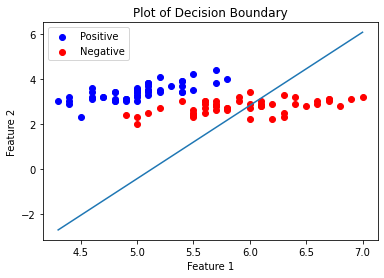

In [32]:
# Calculating the Decision Boundary
decision_boundary_x = np.array([np.min(x_orig[:, 0]), np.max(x_orig[:, 0])])
decision_boundary_y = (- 1.0 / Weight[0]) * (decision_boundary_x * Weight + Bias)
decision_boundary_y = [np.mean(decision_boundary_y[:, 0]), np.mean(decision_boundary_y[:, 1])]


# Positive Data Points
x_pos = np.array([x_orig[i] for i in range(len(x_orig)) if y_orig[i] == 1])

# Negative Data Points
x_neg = np.array([x_orig[i] for i in range(len(x_orig)) if y_orig[i] == 0])

# Plotting the Positive Data Points
plt.scatter(x_pos[:, 0], x_pos[:, 1], color = 'blue', label = 'Positive')

# Plotting the Negative Data Points
plt.scatter(x_neg[:, 0], x_neg[:, 1], color = 'red', label = 'Negative')

# # Plotting the Decision Boundary
plt.plot(decision_boundary_x, decision_boundary_y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Plot of Decision Boundary')
plt.legend()

plt.show()
